/Users/paullucaci/Desktop/P20
/Users/paullucaci/Desktop/P20/ExperimentalMethod


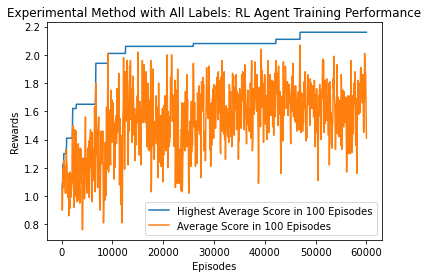

,episode,frame,highest_score,rolling_reward
59550,59550,45205477,2.16,1.69
59600,59600,45250784,2.16,1.82
59650,59650,45300394,2.16,2.01
59700,59700,45344295,2.16,1.94
59750,59750,45389648,2.16,1.69
59800,59800,45437857,2.16,1.88
59850,59850,45481585,2.16,1.81
59900,59900,45528250,2.16,1.67
59950,59950,45569178,2.16,1.49
60000,60000,45614027,2.16,1.41


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

import matplotlib.pyplot as plt
import pandas as pd

%cd /content/drive/MyDrive/P20/
from notebook_plotter import training_plots

%cd /content/drive/MyDrive/P20/ExperimentalMethod/
metrics_filename='./metrics/torch_all-probes-supervised_metrics_breakout.pkl'

training_plots(metrics_filename=metrics_filename, title="Experimental Method with All Labels: RL Agent Training Performance").tail(10)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/MyDrive/P20/ExperimentalMethod/
!git clone https://github.com/openai/baselines.git
!cd baselines; git checkout 9ee399f; pip install .

!pip install gym["atari"]
!python -m atari_py.import_roms "./Atari-Roms"

import sys, os

/content/drive/MyDrive/P20/AtariARI


/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Streaming output truncated to the last 5000 lines.
55018/60000 done 	Episode Score: 0.0		Avg Score 100 Episodes: 1.610000	Highest Avg Score: 2.160000		Frame count: 41380720
55019/60000 done 	Episode Score: 2.0		Avg Score 100 Episodes: 1.630000	Highest Avg Score: 2.160000		Frame count: 41381573
55020/60000 done 	Episode Score: 4.0		Avg Score 100 Episodes: 1.620000	Highest Avg Score: 2.160000		Frame count: 41382817
55021/60000 done 	Episode Score: 3.0		Avg Score 100 Episodes: 1.620000	Highest Avg Score: 2.160000		Frame count: 41383809
55022/60000 done 	Episode Score: 5.0		Avg Score 100 Episodes: 1.630000	Highest Avg Score: 2.160000		Frame count: 41385268
55023/60000 done 	Episode Score: 0.0		Avg Score 100 Episodes: 1.610000	Highest Avg Score: 2.160000		Frame count: 41385792
55024/60000 done 	Episode Score: 2.0		Avg Score 100 Episodes: 1.630000	Highest Avg Score: 2.160000		Frame count: 41386713
55025/60000 done 	Episode Score: 2.0		Avg Score 100 Episodes: 1.640000	Highest Avg Score: 2.160

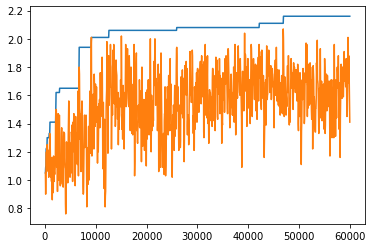

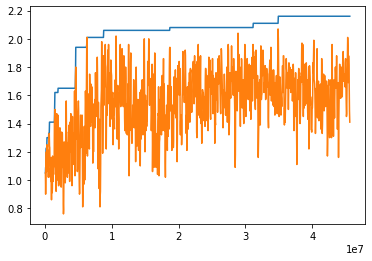

In [ ]:
import torch

%cd /content/drive/MyDrive/P20/ExperimentalMethod/

from p20 import training_p20, wrap_atariari, BaseEncoder
import gym

global device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def main(game_name, seed):

    env = wrap_atariari(gym.make(game_name))
    env.seed(seed)

    p20_model = BaseEncoder().to(device)
    p20_model.load_state_dict(torch.load(open("./models/all-probes_breakout_supervised_encoder.pt", "rb")))
    p20_model.eval()

    training_p20(env=env, seed=seed, solved_at=40, p20_model=p20_model,
                    max_episodes=60000, lr=0.00025, gamma=0.99, max_epsilon=1, min_epsilon=0.1, render=False,
                    metrics_filename='./metrics/torch_all-probes-supervised_metrics_breakout.pkl',
                    checkpoint_filename='./checkpoints/torch_all-probes-supervised_checkpoint_breakout.pkl',
                    theta_filename='./theta/torch_all-probes-supervised_theta_breakout.npy')

if __name__ == "__main__":
    main(game_name="BreakoutNoFrameskip-v4", seed=42)

In [ ]:
while True: pass